

##  Shallow Autoencoder with no Batch Normalization and Dropout layers


#### Reference

#### https://colab.research.google.com/drive/1R_RxoOwi4Y9OMmK8PrPyKWRJba8KBsaI?usp=sharing

#### https://www.youtube.com/watch?v=9zKuYvjFFS8&t=528s

#### https://www.youtube.com/watch?v=D9HjlqIrB-c&t=134s

### Importing necessary Libraries

In [ ]:
# Importing necessary libraries

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
# Setting random seed value 

tf.random.set_seed(42)

### Mounting Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the dataset from keras.datasets import cifar10.

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


### Data Preprocessing

In [ ]:
# Checking the shape of the images

X_train[1].shape

(32, 32, 3)

#### Visualizing the input images

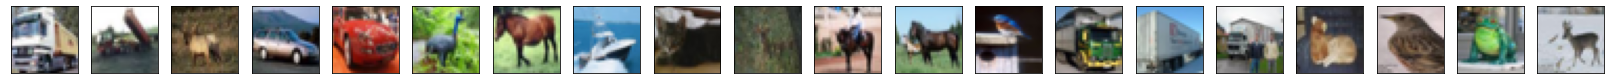

In [ ]:
# Plotting 20 images to visualize

plt.figure(figsize=(30, 5))
for i in range(1, 21):
    # Display original
    ax = plt.subplot(1, 21, i)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Scaling the image to have values between 0 and 1

In [ ]:
# Scaling the images

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

### Reshaping the images into 3072 dimensions to feed to the Autoencoder

In [ ]:
# Reshaping the inputimages into vectors (3072-dim vector)

X_train = X_train.reshape((len(X_train), 32*32*3))
X_test = X_test.reshape((len(X_test), 32*32*3))

### Creating a Shallow Autoencoder without BatchNormalization and Dropout layers

In [ ]:
input_dim = 32*32*3
latent_dim = 192

# Input Layer

input_vector = Input(shape=(input_dim,))

# Encoder Layer ( this layer will compress the input vector in lower dimension )

encoded_layer_1 = Dense(1536, activation='relu')(input_vector)
encoded_layer_2 = Dense(768, activation='relu') (encoded_layer_1)
encoded_layer_3 = Dense(384, activation='relu') (encoded_layer_2)

# latent Layer ( this is the compressed layer )

latent_layer = Dense(latent_dim, activation='relu')(encoded_layer_3)

# Decoder Layer ( this layer will decompress the image into original dimension )

decoded_layer_4 = Dense(384, activation='relu')(latent_layer)
decoded_layer_5 = Dense(768, activation='relu')(decoded_layer_4)
decoded_layer_6 = Dense(1536, activation='relu')(decoded_layer_5)

# Output Layer 

output_vector = Dense(input_dim, activation='sigmoid')(decoded_layer_6)


## Results using Binary Cross Entropy as Loss Function

In [ ]:
# Creating the Model

autoencoder = Model(input_vector, output_vector)

# Compiling the Model

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')



In [ ]:
# Model Summary

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_24 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
dense_25 (Dense)             (None, 768)               1180416   
_________________________________________________________________
dense_26 (Dense)             (None, 384)               295296    
_________________________________________________________________
dense_27 (Dense)             (None, 192)               73920     
_________________________________________________________________
dense_28 (Dense)             (None, 384)               74112     
_________________________________________________________________
dense_29 (Dense)             (None, 768)               2956

In [ ]:
# Defining the batch size and epochs (Hyperparameters)

batch = 256
e = 50

In [ ]:
# Training the model

history = autoencoder.fit(X_train, X_train, epochs=e, batch_size=batch, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 0.6438 - val_loss: 0.6229
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6221 - val_loss: 0.6202
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6141 - val_loss: 0.6120
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6055 - val_loss: 0.6054
Epoch 5/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6040 - val_loss: 0.6028
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6011 - val_loss: 0.6001
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 0.5989 - val_loss: 0.5988
Epoch 8/50
196/196 [==============================] - 2s 11ms/step - loss: 0.5972 - val_loss: 0.5977
Epoch 9/50
196/196 [==============================] - 2s 11ms/step - loss: 0.5959 - val_loss: 0.5959
Epoch 10/50
196/196 [==============================] - 2s 11ms/step - loss: 0.5940 - val_lo

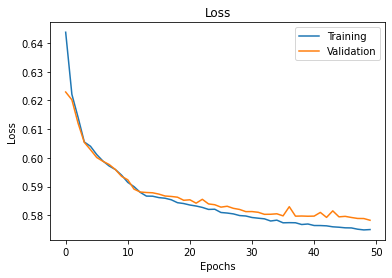

In [ ]:
# Visualizing the Loss function

epoch_range = range(0,e)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# Reconstructing Images based on Test Image Inputs

recon_imgs = autoencoder.predict(X_test)

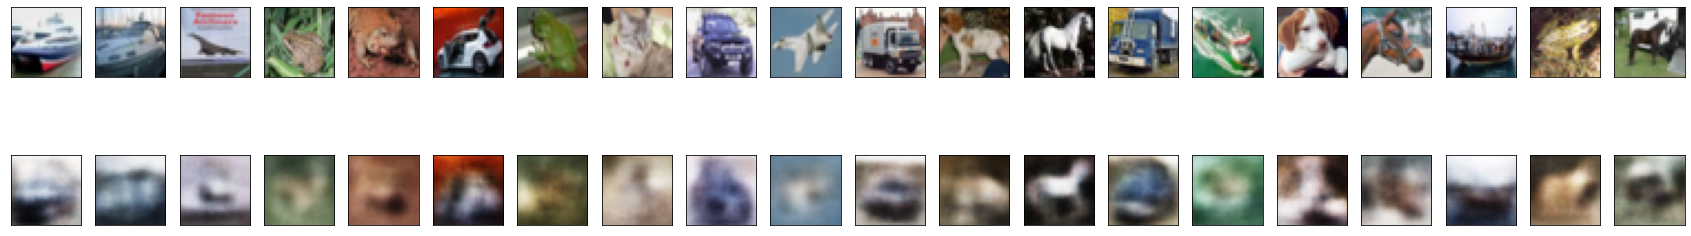

In [ ]:
#Visualizing Reconstructed images

plt.figure(figsize=(30, 5))
for i in range(1, 20 + 1):
    # Display Test Images
    ax = plt.subplot(2, 20, i)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Reconstructed Test Images
    ax = plt.subplot(2, 20, i + 20)
    plt.imshow(recon_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Results using Mean Squarred Error as Loss Function

In [ ]:
# Creating the Model

autoencoder = Model(input_vector, output_vector)

# Compiling the Model

autoencoder.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Model Summary 

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_24 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
dense_25 (Dense)             (None, 768)               1180416   
_________________________________________________________________
dense_26 (Dense)             (None, 384)               295296    
_________________________________________________________________
dense_27 (Dense)             (None, 192)               73920     
_________________________________________________________________
dense_28 (Dense)             (None, 384)               74112     
_________________________________________________________________
dense_29 (Dense)             (None, 768)               2956

In [ ]:
# Defining the batch size and epochs

batch = 256
e = 50

In [ ]:
# Training the model

history = autoencoder.fit(X_train, X_train, epochs=e, batch_size=batch, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 0.0130 - val_loss: 0.0122
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0109 - val_loss: 0.0122
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0108 - val_loss: 0.0121
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0108 - val_loss: 0.0120
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0107 - val_loss: 0.0121
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0107 - val_loss: 0.0122
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0106 - val_loss: 0.0120
Epoch 8/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0106 - val_loss: 0.0122
Epoch 9/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0105 - val_loss: 0.0120
Epoch 10/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0105 - val_lo

In [37]:
# Reconstructing the test images

recon_imgs = autoencoder.predict(X_test)

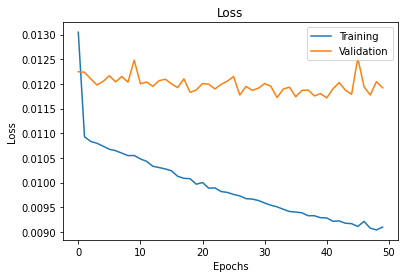

In [38]:
# Visualizing the Loss function

epoch_range = range(0,e)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

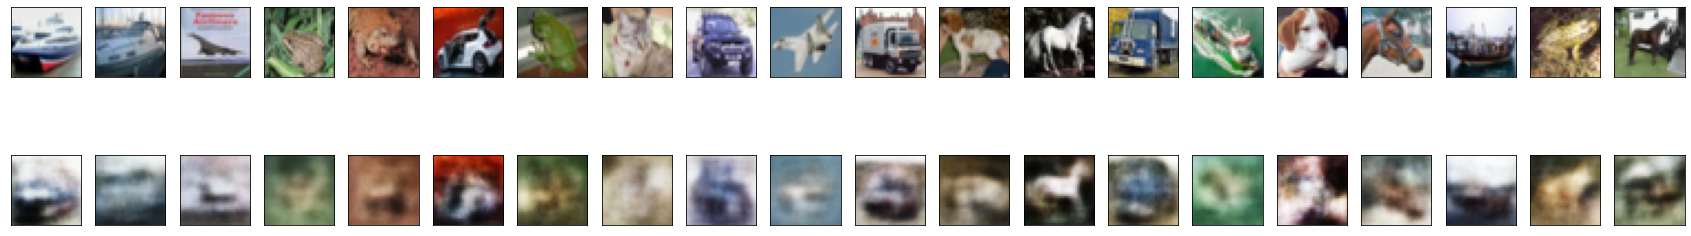

In [40]:
#Visualizing Reconstructed images

plt.figure(figsize=(30, 5))
for i in range(1, 20 + 1):
    # Display original
    ax = plt.subplot(2, 20, i)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 20, i + 20)
    plt.imshow(recon_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Summary

#### This project is to build a shallow autoencoder without batch normalization and dropout layer. The dataset used for this assignment is 'cifar10'. First the dataset is imported from keras libraries. The images size is 32 by 32 by 3. The first 20 images are visualized. The images are then rescaled to have values between 0 and 1. The images were then converted to a vector of size 3072. A three layered shallow autoencoder was created with fully connected dense layers. The neuron architecture is 1536->768->384->192->384->768->1536. It was observed that compressing beyond latent layer of 192 would produce reconstructed image which is distorted beyond recognition (although the images produced by 192 latent images are also blurred) 


#### Hyperparameter Tuning.
#### ------------------------------------------------------------

#### Depth of the Network - Increasing the depth of the network and compressing the latent layer beyond 192 units hampered the performance of the network. Decreasing the depth and increasing the bottleneck size would produce better results. 192 units was the optimal width beyond which the reconstruction went total blurr

#### Loss Function : The experiment was started with 'binary cross entropy' as the loss function. For all the fine tuning of other parameters, the loss function was in the range of 0.63 and 0.56. When the loss function was changed to 'mean squarred error', a significant improvement was observed as the loss function was within the range of 0.03 to 0.009. The reconstruction using 'mean squarred error' was somewhat better than binary cross entropy.

#### Epoch - It was observed that the model will converge at about 50

#### Batch Size - The experiment was performed in the range of 32 - 256 batch size for for both loss function. Best results were obtained for 128/256 batch size.
